In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [3]:
df = pd.read_csv('startup_data.txt',sep=',')
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


## Lets start cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [8]:
df.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [12]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


We can see that Unnamed: 6 is a combination of city and state_code and zip_code

In [16]:
city,state,zipp = list(df['city']),list(df['state_code']),list(df['zip_code'])

In [17]:
loc = []
for i in range(len(city)):
    loc.append(city[i]+" "+state[i]+' '+str(zipp[i]))
loc

['San Diego CA 92101',
 'Los Gatos CA 95032',
 'San Diego CA 92121',
 'Cupertino CA 95014',
 'San Francisco CA 94105',
 'Mountain View CA 94043',
 'Mountain View CA 94041',
 'San Rafael CA 94901',
 'Williamstown MA 1267',
 'Palo Alto CA 94306',
 'Menlo Park CA 94025',
 'Menlo Park CA 94025',
 'Louisville KY 40204',
 'Brooklyn NY 11201',
 'Denver CO 80202',
 'Vienna VA 22182',
 'Los Altos CA 94022',
 'Burlingame CA 94010',
 'New York NY 10004',
 'Palo Alto CA 94301',
 'Austin TX 78735',
 'Seattle WA 98122',
 'Palo Alto CA 94306',
 'San Francisco CA 94103',
 'Boulder CO 80302',
 'Chicago IL 60601',
 'Palo Alto CA 94303',
 'Berkeley CA 94704',
 'Austin TX 78701',
 'Santa Ana CA 92705',
 'Moffett Field CA 94035',
 'Seattle WA 98119',
 'Durham NC 27701',
 'San Francisco CA 94105',
 'Pittsburgh PA 15219',
 'New York NY 10011',
 'San Francisco CA 94111',
 'San Jose CA 95134',
 'San Francisco CA 94107',
 'New York NY 10010',
 'Atlanta GA 30303',
 'Manchester NH 3101',
 'Menlo Park CA 94025',
 

In [18]:
df['Unnamed: 6'] = loc

In [19]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [20]:
df.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                    0
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [22]:
df.loc[df['closed_at'].isnull()]

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,Mountain View CA 94041,RingCube Technologies,1,...,c:16191,1,0,1,1,0,0,1.6667,1,acquired
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,284,NY,40.742953,-73.984461,10018,c:17758,New York,New York NY 10018,TRAFFIQ,1,...,c:17758,1,0,1,1,0,0,2.3333,1,acquired
917,1099,WA,47.802184,-122.196307,98021,c:8339,Bothell,Bothell WA 98021,Dexterra,1,...,c:8339,1,0,0,0,1,1,5.6000,1,acquired
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,San Francisco CA 94107,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,San Francisco CA 94404,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [23]:
df['closed_at']

0            NaN
1            NaN
2            NaN
3            NaN
4      10/1/2012
         ...    
918          NaN
919    6/25/2008
920    6/17/2012
921          NaN
922          NaN
Name: closed_at, Length: 923, dtype: object

It seems the null values in the column of "closed_at" are due to the fact that they are still operational so let us replace these with the string of "Still Operating"

In [27]:
df['closed_at'] = df['closed_at'].fillna('Still Operating')

In [28]:
df.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                    0
name                          0
labels                        0
founded_at                    0
closed_at                     0
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

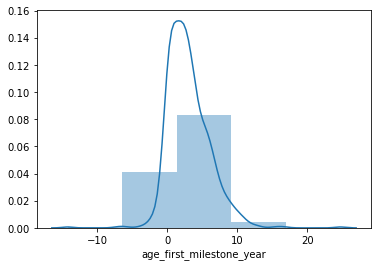

In [34]:
sns.distplot(df['age_first_milestone_year'],bins=5)

In [31]:
print(df['age_first_milestone_year'].mean(),df['age_first_milestone_year'].median())

3.055353047989626 2.5205


In [36]:
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(df['age_first_milestone_year'].mean())

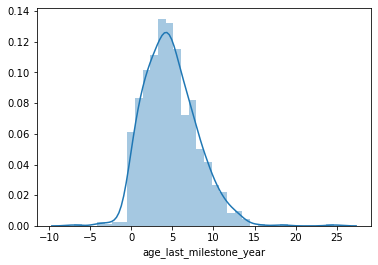

In [37]:
sns.distplot(df['age_last_milestone_year'])

In [38]:
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(df['age_last_milestone_year'].mean())

In [39]:
df.isnull().sum()

Unnamed: 0                  0
state_code                  0
latitude                    0
longitude                   0
zip_code                    0
id                          0
city                        0
Unnamed: 6                  0
name                        0
labels                      0
founded_at                  0
closed_at                   0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
state_code.1                1
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_adverti

In [43]:
df.loc[df['state_code.1'].isnull()]['state_code.1']

515    NaN
Name: state_code.1, dtype: object

In [44]:
df[['state_code','state_code.1']]

,state_code,state_code.1
0,CA,CA
1,CA,CA
2,CA,CA
3,CA,CA
4,CA,CA
...,...,...
918,CA,CA
919,MA,MA
920,CA,CA
921,CA,CA


In [48]:
#Both columns are similar so lets fill it

df.loc[df['state_code.1'].isnull()][['state_code.1','state_code']]

,state_code.1,state_code
515,NaN,CA


In [49]:
df.loc[515,'state_code.1'] = 'CA'

In [50]:
df.isnull().sum()

Unnamed: 0                  0
state_code                  0
latitude                    0
longitude                   0
zip_code                    0
id                          0
city                        0
Unnamed: 6                  0
name                        0
labels                      0
founded_at                  0
closed_at                   0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
state_code.1                0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_adverti

### Now lets do a final operation to check if the length of all unique values in each column is same as length of dataframe to see if all null values are removed

In [55]:
for i in df.columns:
    print(f' Column name : {i} and unique values : {df[i].unique()}')

 Column name : Unnamed: 0 and unique values : [1005  204 1001  738 1002  379  195  875   16  846  685  835  531  137
  162  898  235   25  858  454  369  289  177   26  803  797  572  503
  642  625  355  510  485  145  605  785  562  619  378   63   65  139
   98  681  884  207  747  593 1010  403  666  847  421  364   31  768
 1059  320  445  950  617 1112  332  787  396  431 1101   13  452  492
   20  315  231  245  484  810  744  748  138  555  943  703  863   85
  995  883  541  501  491  537  125  279  242 1097  387  895  251  390
 1023  459  930  934  917  670  811  339  163  121 1149  316  187  274
  763  695  973  618  574  483 1151  881  841  370  615  925  506  704
  179  550  764  218  299 1114   58  782 1020  280  873  430 1065  312
  220  206  928  158  979 1085  977  639 1092  327  494   87  985  432
  882  937   77  608  601  392  535  736  836  165  828  227  725  159
  709  868   30  609 1102  760  502  295 1087 1060 1105 1084  215   35
  276  569  216 1090  901   46 

In [56]:
#Cleaning complete

In [57]:
df.to_csv('Cleaned_startup data [data15].csv')